In [ ]:
Name:Raushan Kr. Jha
    

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
path = "C:\\Users\\user\\Downloads\\archive\\car_data.csv"  # Update this to your actual file path

In [6]:
df = pd.read_csv(path)

In [7]:
print("Column Names:\n", df.columns)

Column Names:
 Index(['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement',
       'drive', 'fuel_type', 'highway_mpg', 'make', 'model', 'transmission',
       'year'],
      dtype='object')


In [8]:
df['target'] = np.where(df['combination_mpg'] > 25, 'high', 'low')

In [10]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
target             0
dtype: int64


In [11]:
df = df.dropna()

In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
print("Missing Values After Replacement:\n", df.isnull().sum())


Missing Values After Replacement:
 city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
target             0
dtype: int64


In [14]:
df = df.dropna()

In [15]:
inputs = df.drop(['target'], axis='columns')
target = df['target']

In [16]:
print("Inputs:\n", inputs)

Inputs:
      city_mpg                        class  combination_mpg  cylinders  \
0          25                  midsize car               29        4.0   
1          26                  midsize car               30        4.0   
2          25  small sport utility vehicle               27        4.0   
3          26  small sport utility vehicle               29        4.0   
4          26  small sport utility vehicle               28        4.0   
..        ...                          ...              ...        ...   
545        23                  compact car               27        4.0   
546        21                  midsize car               24        6.0   
547        21                  midsize car               24        6.0   
548        17                  midsize car               19        8.0   
549        17                  midsize car               19        8.0   

     displacement drive fuel_type  highway_mpg   make  \
0             2.5   fwd       gas           3

In [17]:
print("Target:\n", target)

Target:
 0      high
1      high
2      high
3      high
4      high
       ... 
545    high
546     low
547     low
548     low
549     low
Name: target, Length: 548, dtype: object


In [18]:
le_class = LabelEncoder()
le_drive = LabelEncoder()
le_fuel_type = LabelEncoder()
le_make = LabelEncoder()
le_model = LabelEncoder()
le_transmission = LabelEncoder()

In [19]:
inputs['class_n'] = le_class.fit_transform(inputs['class'])
inputs['drive_n'] = le_drive.fit_transform(inputs['drive'])
inputs['fuel_type_n'] = le_fuel_type.fit_transform(inputs['fuel_type'])
inputs['make_n'] = le_make.fit_transform(inputs['make'])
inputs['model_n'] = le_model.fit_transform(inputs['model'])
inputs['transmission_n'] = le_transmission.fit_transform(inputs['transmission'])

In [20]:
print("Modified Inputs:\n", inputs)

Modified Inputs:
      city_mpg                        class  combination_mpg  cylinders  \
0          25                  midsize car               29        4.0   
1          26                  midsize car               30        4.0   
2          25  small sport utility vehicle               27        4.0   
3          26  small sport utility vehicle               29        4.0   
4          26  small sport utility vehicle               28        4.0   
..        ...                          ...              ...        ...   
545        23                  compact car               27        4.0   
546        21                  midsize car               24        6.0   
547        21                  midsize car               24        6.0   
548        17                  midsize car               19        8.0   
549        17                  midsize car               19        8.0   

     displacement drive fuel_type  highway_mpg   make  \
0             2.5   fwd       gas   

In [21]:
inputs_n = inputs.drop(['class', 'drive', 'fuel_type', 'make', 'model', 'transmission'], axis='columns')
print("Encoded Inputs:\n", inputs_n)

Encoded Inputs:
      city_mpg  combination_mpg  cylinders  displacement  highway_mpg  year  \
0          25               29        4.0           2.5           36  2014   
1          26               30        4.0           2.5           37  2014   
2          25               27        4.0           2.5           31  2014   
3          26               29        4.0           2.0           34  2014   
4          26               28        4.0           2.0           32  2014   
..        ...              ...        ...           ...          ...   ...   
545        23               27        4.0           2.0           33  2024   
546        21               24        6.0           3.0           29  2024   
547        21               24        6.0           3.0           29  2024   
548        17               19        8.0           4.4           24  2024   
549        17               19        8.0           4.4           24  2024   

     class_n  drive_n  fuel_type_n  make_n  mo

In [22]:
model = tree.DecisionTreeClassifier()

In [23]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [24]:
new_data = pd.DataFrame({
    'city_mpg': [30],
    'cylinders': [4],
    'displacement': [140],
    'highway_mpg': [38],
    'year': [2020],
    'combination_mpg': [35],
    'class_n': [1],  # Example encoded value for 'class'
    'drive_n': [0],  # Example encoded value for 'drive'
    'fuel_type_n': [0],  # Example encoded value for 'fuel_type'
    'make_n': [3],  # Example encoded value for 'make'
    'model_n': [2],  # Example encoded value for 'model'
    'transmission_n': [1],  # Example encoded value for 'transmission'
})

In [25]:
predictions = model.predict(new_data)
print("Predictions for new data:", predictions)


Predictions for new data: ['low']


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


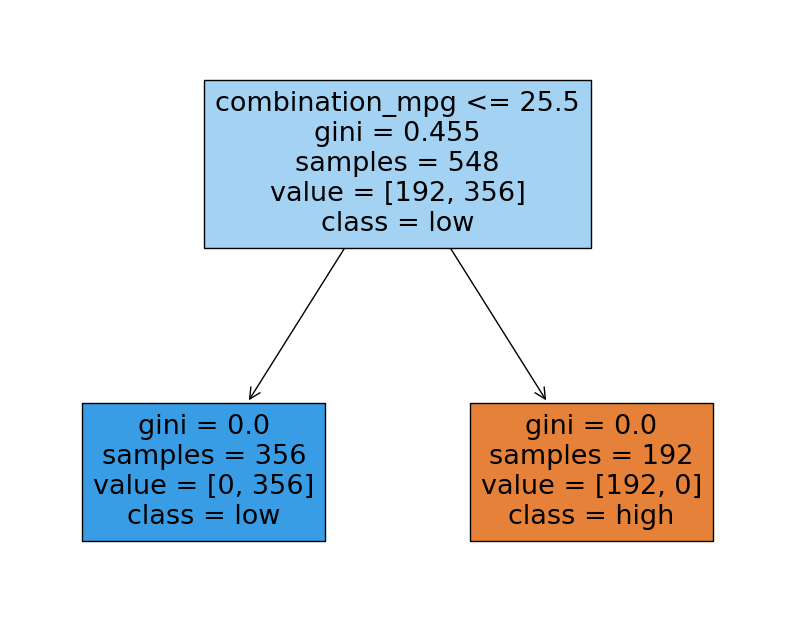

In [26]:
plt.figure(figsize=(10, 8))
tree.plot_tree(model, filled=True, feature_names=inputs_n.columns, class_names=target.unique())
plt.show()